# Mosaic Art

We would like to use images as mosaic pieces to build a bigger image.

Data originally comes from [here](https://www.kaggle.com/thedownhill/art-images-drawings-painting-sculpture-engraving).

In [1]:
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
from PIL import Image

from lets_plot import *
LetsPlot.setup_html()

In [2]:
def get_grayscale_img(filepath):
    if not isfile(filepath):
        return None
    img = Image.open(filepath)
    if not img.mode in ['RGB', 'L']:
        return None
    return img.convert('L')

In [3]:
WIDTH, HEIGHT = 20, 20
IMAGES_PATH = '../data/sculpture'

In [4]:
data = []
for f in listdir(IMAGES_PATH):
    img = get_grayscale_img(join(IMAGES_PATH, f))
    img = img.resize((WIDTH, HEIGHT))
    image_data = np.asarray(img).reshape(WIDTH * HEIGHT)
    image_agg_data = np.array([np.round(image_data.mean()), np.round(image_data.std())])
    data.append(np.concatenate((image_agg_data, image_data), axis=0).astype(int))

In [5]:
df = pd.DataFrame(data)
df = df.rename(columns={0: 'color', 1: 'std'})
df = df.sort_values(by=['color', 'std']).reset_index(drop=True)

In [6]:
ggplot() + \
    geom_bar(aes(x='color', fill='color'), data=df, sampling=sampling_pick(n=256)) + \
    scale_fill_gradient(low='black', high='white') + \
    ggtitle('Gray Color Distribution')

In [7]:
for missing_color in set(range(256)) - set(df.color.unique()):
    df = df.append([dict(color=missing_color)])
df = df.sort_values(by='color').reset_index(drop=True)
df = df.fillna(method='pad').fillna(method='backfill')

In [8]:
img = get_grayscale_img(join(IMAGES_PATH, 'i - 663.jpeg'))
img = img.resize((80, 80))
rows = ()
for row in np.asarray(img):
    cols = ()
    for color in row:
        subimg = df[df.color == color].iloc[0, 2:].to_numpy().reshape(WIDTH, HEIGHT)
        cols = cols + (subimg,)
    rows = rows + (np.hstack(cols),)
image_data = np.vstack(rows)


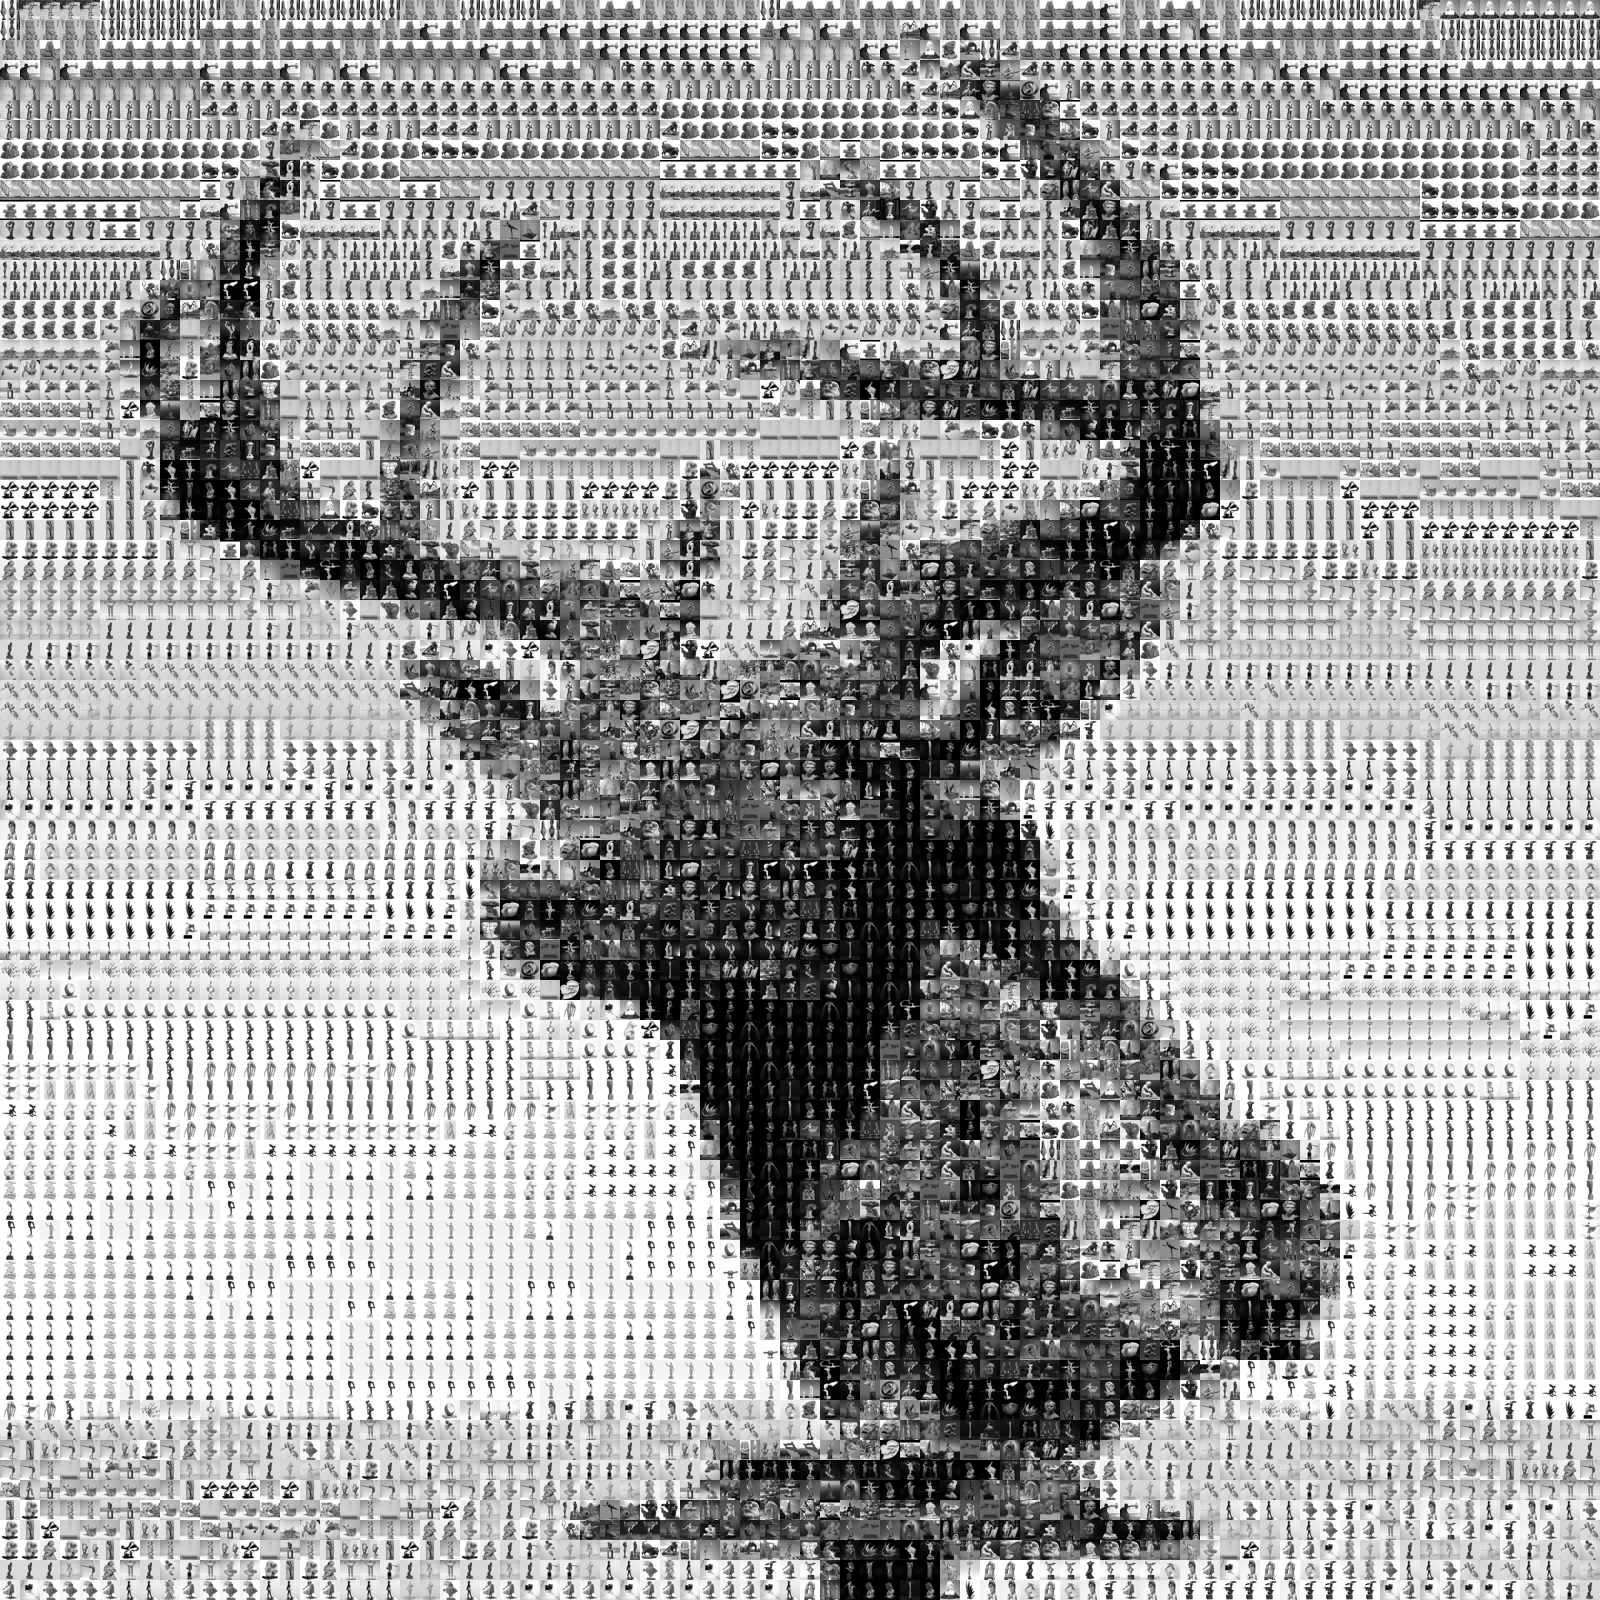

In [9]:
ggplot() + \
    geom_image(image_data=image_data) + \
    ggsize(800, 800) + \
    ggtitle('Mosaic Image') + \
    theme(legend_position='none', axis_text='blank', axis_title='blank', axis_ticks='blank', axis_line='blank')